## Week 3 : Logistic Regression 
```
- Machine Learning, Innopolis University (Fall semester 2021)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Recap on Logistic Regression
2. Data for Classification Task 
3. Dealing with data imbalance 
4. Classification task evaluation metrics

```

<hr>

## 1. Recap 

$$\hat p(x) = \frac{e^{\beta_0 + \beta_1 x}}{1+e^{\beta_0 + \beta_1 x}}$$
<br>
$$L(\hat{p}(x_i), y_i) = -y_i * \log (\hat{p}(x_i)) - (1 - y_i) * \log (1 -\hat{p}(x_i))$$
<br>
$$L(\hat{p}(x_i), y_i) = \left\{\begin{matrix}
\ - log (\hat{p}(x_i)), & y_i=1\\ 
\ - log (1 -\hat{p}(x_i)), & y_i=0
\end{matrix}\right.$$
<br>
$$\hat y = \left\{\begin{matrix}
1 && \hat p(x) > threshold\\ 
0 && otherwise 
\end{matrix}\right.$$

1. How to select the threshold? 

<br>
Let's now see how the shape of $\hat p(x)$ depends on its parameters:

### 1.1 Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

### 1.2 Plot Sigmoid Function 

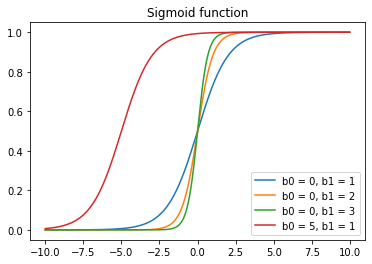

In [2]:
x = np.arange(-10, 10, 0.01)

def plot(b0, b1):
    p = np.exp(b0 + b1 * x) / (1 + np.exp(b0 + b1 * x))
    label = "b0 = {}, b1 = {}".format(b0, b1)
    plt.plot(x, p, label=label)

plot(0,1)
plot(0,2)
plot(0,3)
plot(5,1)
plt.legend()
plt.title('Sigmoid function')
plt.show()

What is controlled by parameters b0, b1?

### 1.3 Loss function plot

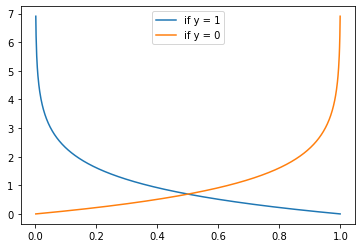

In [3]:
x = np.arange(0.001, 1, 0.001)
y1 = -np.log(x)
y0 = -np.log(1-x)

plt.plot(x,y1, label="if y = 1")
plt.plot(x,y0, label="if y = 0")
plt.legend()
plt.show()

What are the benefits of using logarithms in the loss function?  <br><br>

## 2. Data for Classification Task

* How is data for regression different from classification task different? 

Complete the analysis of what sorts of people were likely to survive.
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

### 2.1 Load Data

In [4]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S
2,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,151.5500,S
3,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,151.5500,S
4,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,151.5500,S


### 2.2 Exploratory data analysis (EDA)

An approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods (i.e matplotlib, distribution plot ..)<br> 
Today we are going to try a tool called [pandas profiling](https://github.com/pandas-profiling/pandas-profiling). It can be easily be installed with:
1. pip: `pip3 install pandas-profiling`  
1. conda: `conda install -c conda-forge pandas-profiling
`

**Note:** All that is done by pandas profilling can be easily be achieved with pandas, matplotlib and numpy

In [ ]:
import pandas_profiling

## Create the data profile report
pandas_profiling.profile_report.ProfileReport(titanic_df)

### 2.3 Data preprocessing
1. How to deal with missing values? 
1. How to deal with categorical data? 
1. Is data data scaling needed? 

**TASK:**
1. Split data to train and test
2. Impute missing values
3. Use min-max scaler for feature scaling

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Select features 
titanic_df.drop(['name'], axis = 1, inplace=True)

# TODO: Split data to train and test


# TODO: impute missing values


# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(x_train[f_names])
x_train = ohe_new_features(x_train, f_names, encoder)
x_test = ohe_new_features(x_test, f_names, encoder)

# TODO: feature scaling using MinMaxScaler

### 2.4 Build, Train and Test Model

Now we are ready to see Logistic Regression in practice.

### Task. 
1. Fit Logistic Regression 
1. Output Accuracy, Precision, and Recall scores on test set.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# TODO: fit Logistic Regression
clf = None
y_test_pred = None

# TODO: caclulate metrics


Testing accuracy = 0.7748091603053435
Testing precision = 0.711340206185567
Testing recall = 0.69


###  2.5 Prediction Results Interpretation & Model perfomence Measurement

1. looking at Logistic Regression Coefficients
2. Prediction threshold

### Task : 
1. Calculate Accuracy, Precision, and Recall values for each of the given threshold values and plot them.

In [8]:
# Logistic Regression Coefficients
print("----Logistic Regression Coefficients----")
print(*[a for a in zip(list(x_train.columns), clf.coef_[0])], sep='\n')

----Logistic Regression Coefficients----
('pclass', -1.781435637905225)
('age', -1.9688801247523577)
('sibsp', -1.6052031186453222)
('parch', -0.2651422009453602)
('fare', 0.559242536208092)
('sex_male', -2.5188514708647953)
('embarked_Q', -0.3462587597091774)
('embarked_S', -0.4362184428045464)


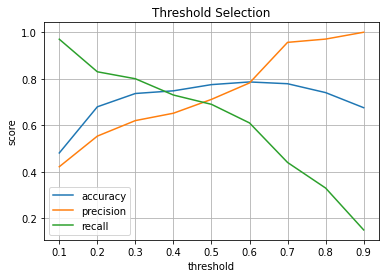

In [9]:
# TODO: calculate metrics for each threshold above and plot the result as below.
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
pred_proba = clf.predict_proba(x_test)

results = [[],[],[]]
for i in thresholds:
    #TODO: Calculate accuracy_score, precision_score & recall_score
    
plt.plot(thresholds, results[0], label = 'accuracy')   
plt.plot(thresholds, results[1], label = 'precision')   
plt.plot(thresholds, results[2], label = 'recall')
plt.title('Threshold Selection')
plt.xlabel('threshold')
plt.ylabel('score')
plt.legend()
plt.grid()

### Confusion matrix

1. Why one may need confusion matrix? 
2. What new information does it show? <br><br>

<table><tr><td>
<img align='center' src='https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg' style='width: 350px;'>
</td><td>
<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_confusion_matrix_002.png' style='width: 400px;'></td></tr></table>
<br>


### Task: 
1. Implement a confussion matrix method from scratch using python list and numpy

In [10]:
def calc_confusion_matrix(true_labels, pred_labels):
    """Compute confusion matrix to evaluate the accuracy of a classification
    
    Parameters
    ----------
    true_labels : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    pred_labels : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    """
    # TODO : Implement
    return None

In [11]:
## computing confusion matrix
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
print("Confusion Matrix for Test 1")
print(calc_confusion_matrix(y_true, y_pred))

titanic_cm = calc_confusion_matrix(y_test, clf.predict(x_test))
print('Confusion Matrix for Titanic:\n', titanic_cm, '\n')

Confusion Matrix for Test 1
[[2 0 0]
 [0 0 1]
 [1 0 2]]
Confusion Matrix for Titanic:
 [[134  28]
 [ 31  69]] 



In [12]:
# Run this block of code to see what your result should look like
from sklearn.metrics import confusion_matrix
print('sklearn Confusion Matrix for Sample set:\n', confusion_matrix(y_true, y_pred))
print('sklearn Confusion Matrix for Titanic:\n', confusion_matrix(y_test, clf.predict(x_test)), '\n')


sklearn Confusion Matrix for Sample set:
 [[2 0 0]
 [0 0 1]
 [1 0 2]]
sklearn Confusion Matrix for Titanic:
 [[134  28]
 [ 31  69]] 

